# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-bv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s1_2016-11-14_1456
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s2_2016-11-15_1327
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s3_2016-11-15_1338
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s1_2016-11-15_1615
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s2_2016-11-15_1623
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s3_2016-11-15_1636
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s1_2016-11-18_1444
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s2_2016-11-18_1454
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s3_2016-11-18_1503
(758, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', 

Transforming the data set first.

In [3]:
ds.BvL = np.round(ds.BvL*60/35,1)
ds.BvR = np.round(ds.BvR*60/35,1)
ds['bvDiff'] = abs(ds['BvR'] - ds['BvL'])
ds['bvMin'] = np.amin([ds['BvL'], ds['BvR']], axis=0)
ds['bvMax'] = np.amax([ds['BvL'], ds['BvR']], axis=0)
ds['tfMin'] = ds.bvMin
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

       expName             time  participant  session  trialN  dirL  dirR  vL  \
0  mcEcc_ct-bv  2016-11-14_1456            0        1       1     0     0   0   
1  mcEcc_ct-bv  2016-11-14_1456            0        1       2     0     0   0   
2  mcEcc_ct-bv  2016-11-14_1456            0        1       3     0     0   0   
3  mcEcc_ct-bv  2016-11-14_1456            0        1       4     0     0   0   
4  mcEcc_ct-bv  2016-11-14_1456            0        1       5     0     0   0   

   vR  szL  ...   pd000     pd090     pd180     pd270  qnResp  ringSz  bvDiff  \
0   0  256  ...     0.0  0.016667  0.000000  0.000000       0  258.00     2.1   
1   0  256  ...     0.0  0.000000  0.000000  0.016667       0   32.25     1.0   
2   0  256  ...     0.0  0.016667  0.000000  0.000000       0  258.00    12.4   
3   0  256  ...     0.0  0.000000  0.016667  0.000000       0  258.00     1.6   
4   0  256  ...     0.0  0.000000  0.016667  0.000000       0   64.50     0.5   

   bvMin  bvMax tfMin  
0 

## Visualization

### Proportion of trials

In [4]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0   40  0.158730  0.366151   252
1            1  131  0.519841  0.500600   252
2            3  109  0.429134  0.495930   254
Fast (left):
   participant  sum      mean       std  size
0            0  125  0.496032  0.500979   252
1            1   84  0.333333  0.472343   252
2            3  118  0.464567  0.499728   254
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   87  0.345238  0.476392   252
1            1   37  0.146825  0.354636   252
2            3   27  0.106299  0.308829   254


In [ ]:
ssRing = ds[ds.ringSz < 258]
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Slow (down)

(-0.1, 1.1)

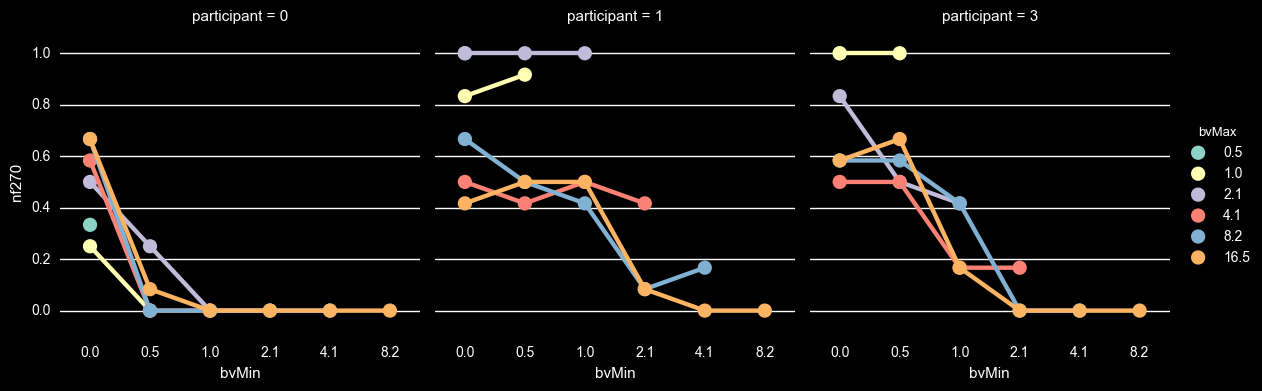

In [18]:
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

With higher velocity bandwindth, the occurence of the slow center phenomenon drops sharply. However, this appears less so for when one of the competing velocities is high (4.8 and 9.6), as there are still some trials when the slow motion is still seen.

(-0.1, 1.1)

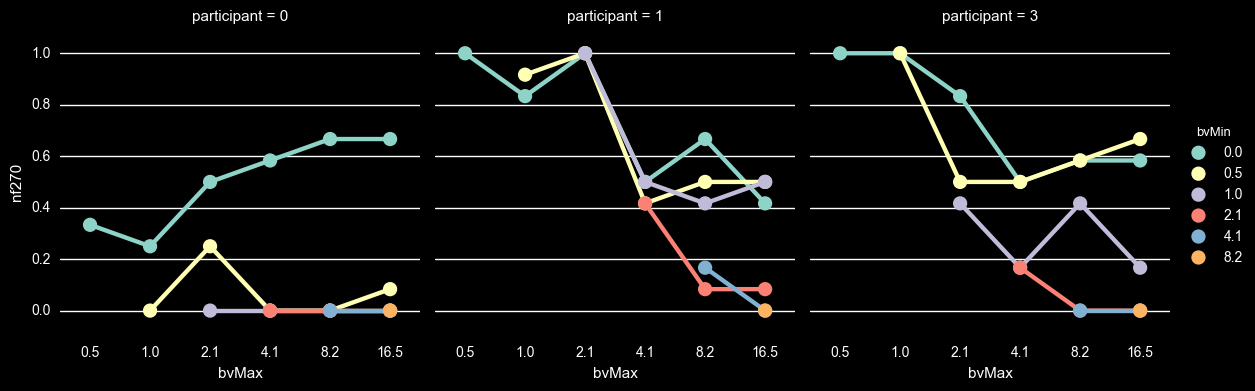

In [17]:
g = sns.factorplot(x='bvMax', y='nf270', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Fast (left)

(-0.1, 1.1)

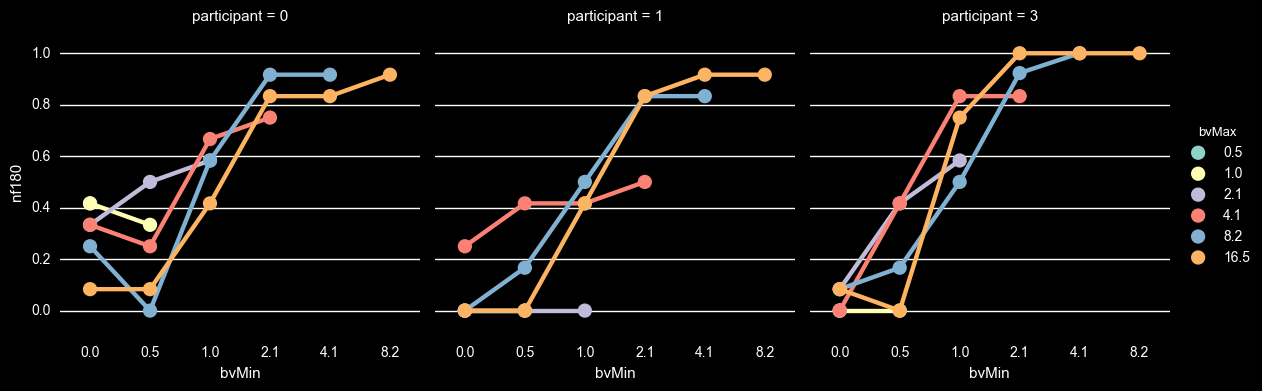

In [16]:
g = sns.factorplot(x='bvMin', y='nf180', hue='bvMax', col='participant', col_wrap=3, 
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

As the velocity bandwidth increases, the dominance of fast velocity is more obvious.

(-0.1, 1.1)

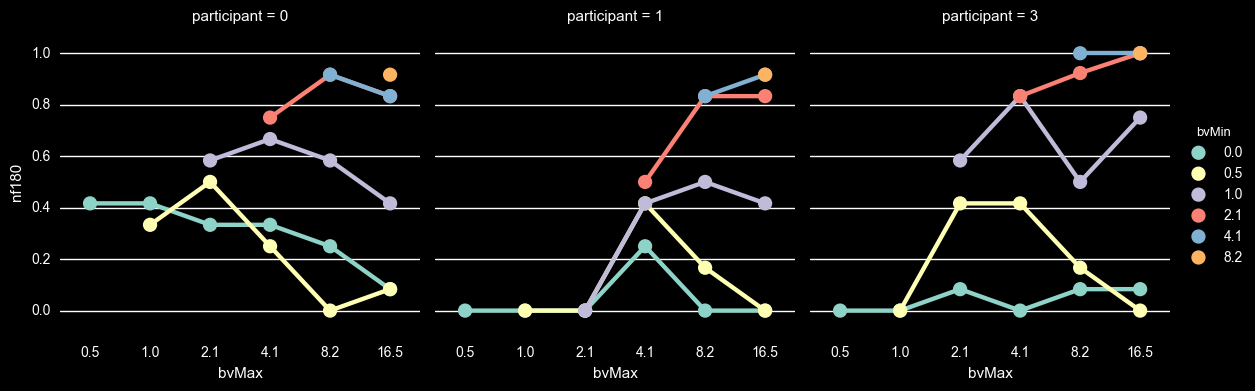

In [19]:
g = sns.factorplot(x='bvMax', y='nf180', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Patchy/transparent (up)

(-0.1, 1.1)

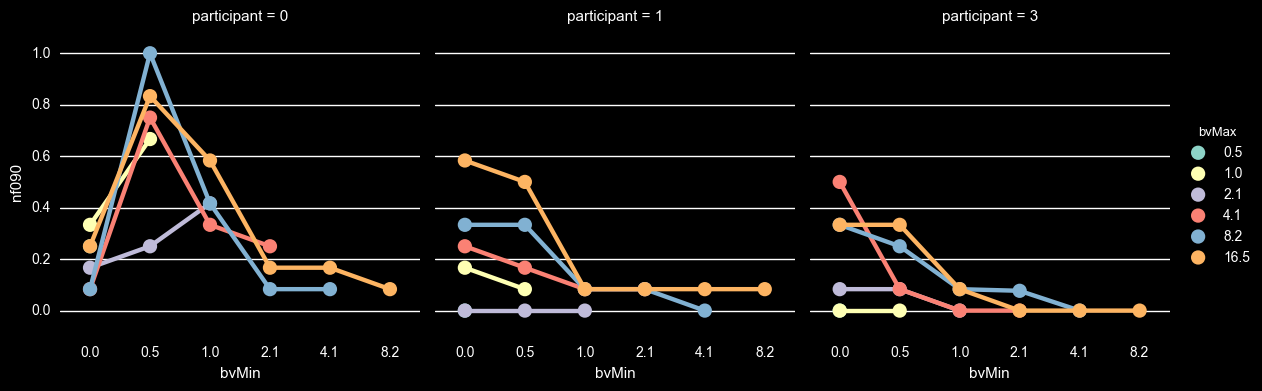

In [20]:
g = sns.factorplot(x='bvMin', y='nf090', hue='bvMax', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

At the intermediate velocity bandwidth of .3, there are many 'patchy' trials. This occurs whenever one of the competing patterns is fast (2.4 or above).

(-0.1, 1.1)

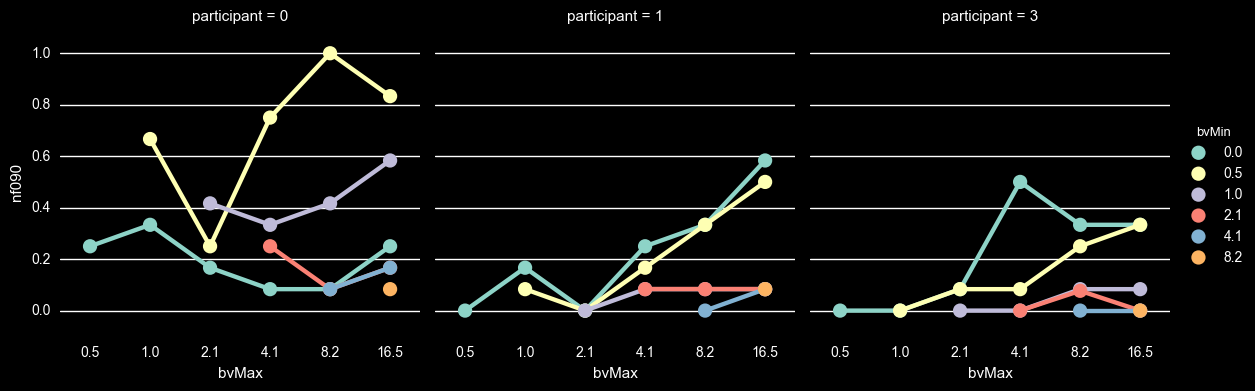

In [21]:
g = sns.factorplot(x='bvMax', y='nf090', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

### Ring size

#### Slow (down)

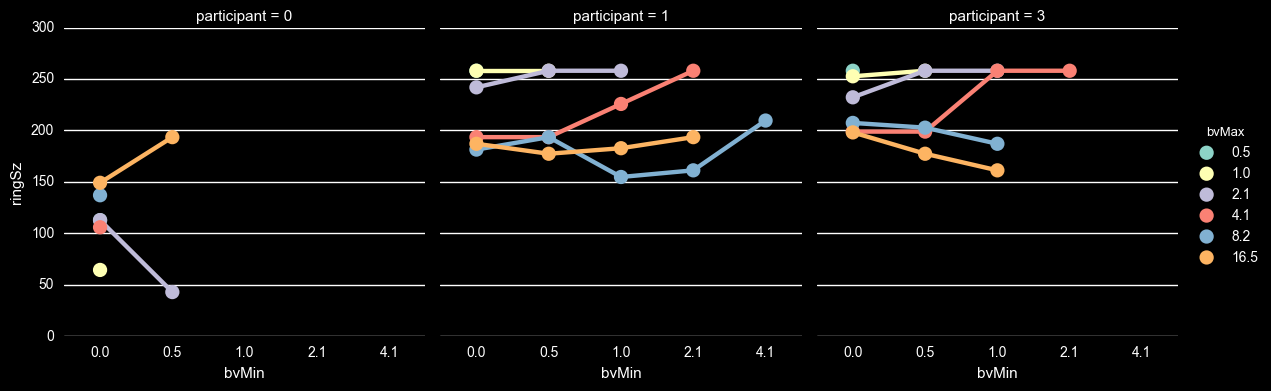

In [22]:
ss = ds[ds.nf270==1]
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ss, ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

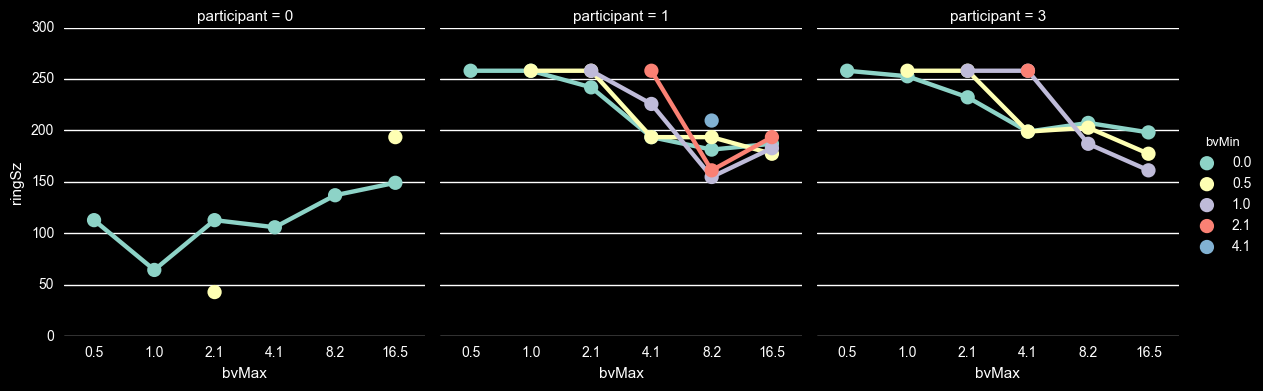

In [23]:
ss = ds[ds.nf270==1]
g = sns.factorplot(x='bvMax', y='ringSz', hue='bvMin', col='participant', col_wrap=3,
                   data=ss, ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

#### Fast (left)

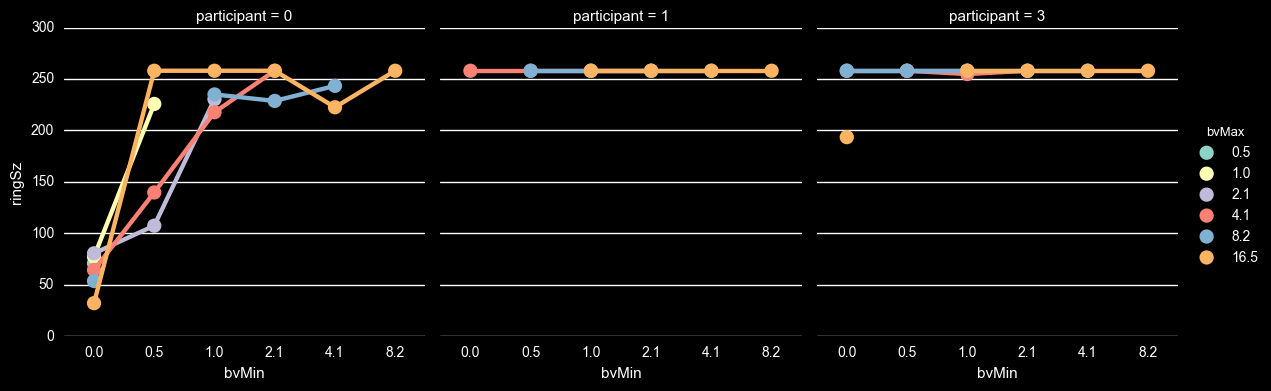

In [25]:
ss = ds[ds.nf180==1]
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ss, ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

Meaningfully, the size of the fast-center quickly saturates to the maximum as the tf of both stimuli increases. I.e., the fast-center is still present for intermediate-to-low tf, but only when they are competing with another low-tf stimulus.

#### Patchy/transparent

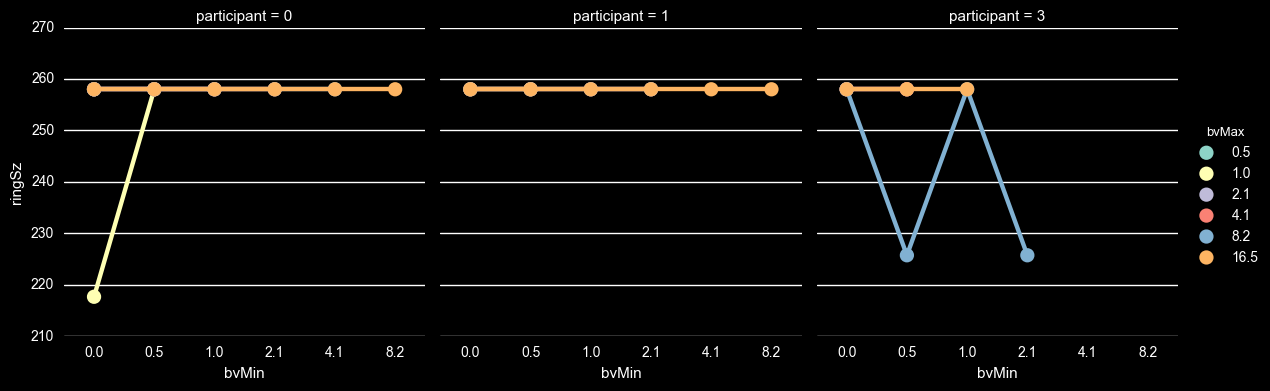

In [26]:
ss = ds[ds.nf090==1]
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ss, ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

# Eye-tracking data

## Data import

In [15]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

IndexError: list index out of range

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd